##  Case Study on Regression

The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.


Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the given dataset into the notebook.

In [2]:
df = pd.read_csv(r"C:\Users\ALFRED\Downloads\car_age_price.csv")

Find the necessary details about the dataset.

In [3]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
df.isna().sum()   # there are no missing values.

Year     0
Price    0
dtype: int64

In [7]:
df.columns

Index(['Year', 'Price'], dtype='object')

Look for outliers in the dataset.

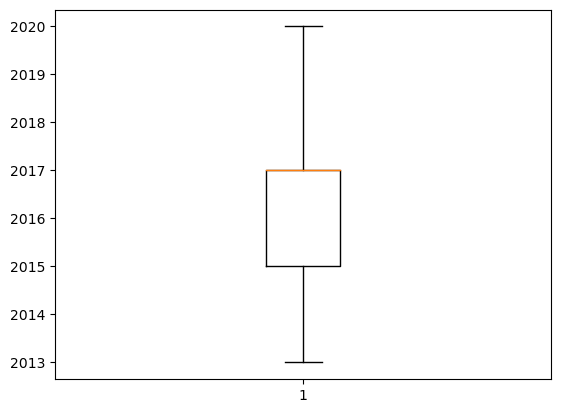

In [8]:
plt.boxplot(df['Year'])
plt.show()                  # Year column has no outliers.

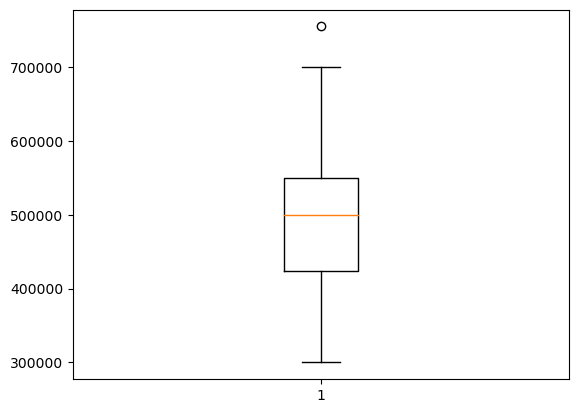

In [9]:
plt.boxplot(df[ 'Price'])
plt.show()                     # Price column has an outlier.

In [10]:
df.value_counts('Year')

Year
2017    47
2015    22
2019    12
2018    11
2014     6
2016     6
2013     4
2020     4
dtype: int64

In [11]:
df.drop([1], inplace = True)

Here there is only a single outlier that is above 700000 and it is in the index 1. We can find it by just looking through the data. It occurs in the year 2019 and even if we remove it, there are 11 more price values in the year 2019. So, we just drop the index 1.

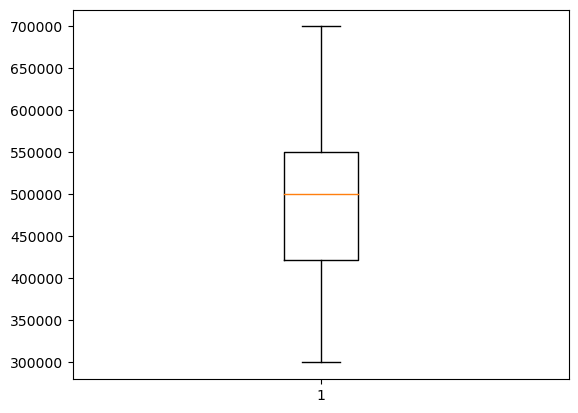

In [12]:
plt.boxplot(df[ 'Price'])
plt.show()         # Outlier removed.

Splitting the data set columns into independent variables and dependent variables.

In [13]:
X = df['Year'].values.reshape(-1, 1) # Independent variable
y = df[ 'Price']    #Dependent variable

We now do linear and lasso regression on the dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [16]:
from sklearn.linear_model import LinearRegression 

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [18]:
from sklearn.linear_model import Lasso

In [19]:
ls = Lasso(alpha = 0.1)
ls.fit(X_train, y_train)
y_pred1 = ls.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error , r2_score

In [21]:
linear_regression_mse = mean_squared_error(y_test, y_pred)
linear_regression_r2 = r2_score(y_test, y_pred)

In [22]:
lasso_regression_mse = mean_squared_error(y_test, y_pred1)
lasso_regression_r2 = r2_score(y_test, y_pred1)

In [23]:
print("Linear regression MSE:", linear_regression_mse)
print("Lasso regression MSE :", lasso_regression_mse)

Linear regression MSE: 2429380860.130084
Lasso regression MSE : 2429381180.396382


In [24]:
print("Linear regression r2:", linear_regression_r2)
print("Lasso regression r2 :", lasso_regression_r2)

Linear regression r2: 0.6703929057122116
Lasso regression r2 : 0.67039286225997


The MSE and r2 values for both linear and lasso regression donot show much difference. So it is not optimal to say that one is better than the other in this case.

In [25]:
prediction1 = lr.fit(X_train, y_train).predict([[2022]])

In [26]:
prediction2 = ls.fit(X_train, y_train).predict([[2022]])

In [27]:
print("Price prediction Linear:", prediction1)
print("Price prediction Lasso :", prediction2)

Price prediction Linear: [703760.59230244]
Price prediction Lasso : [703760.38027929]


For the year 2022 both linear and lasso regressions predict about 703760 as the price for the car.